<a href="https://www.kaggle.com/code/sakethyalamanchili/titanic-survival-prediction?scriptVersionId=168439198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Titanic Survival Prediction** 


![6StepProcedure](https://github.com/sakethyalamanchili/Diabetes-Prediction-Project/raw/main/6-step-procedure.png)

### **1. Problem Definition**
The objective is to predict the survival of passengers on the Titanic incident using appropriate modeling techniques.

### **2. Data**
The dataset is sourced from a competition on Kaggle. https://www.kaggle.com/competitions/titanic/data

### **3. Evaluation**
The problem is a supervised learning task, specifically classification, as we aim to predict whether a passenger survived or not (0 = No, 1 = Yes). The evaluation metric will be accuracy. We'll also explore other evaluation metrics like precision and recall.

### **4. Features**
- **survival**: Whether a person survived or not (0 = No, 1 = Yes)
- **pclass**: Class of ticket purchased by the passenger (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Gender of the passenger (Male/Female)
- **Age**: Age of the passenger in years
- **sibsp**: Number of siblings / spouses aboard the Titanic
- **parch**: Number of parents / children aboard the Titanic
- **ticket**: Ticket number
- **fare**: Passenger fare
- **cabin**: Cabin number
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### **5. Modeling**
We will experiment with various models/algorithms to determine their performance. This includes baseline modeling and hyperparameter tuning to optimize model performance.


## Preparing all the necessary tools for our project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import catboost
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

2024-03-23 14:54:39.184039: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 14:54:39.184156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 14:54:39.335935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def categorical_features(df):
    categorical_features = []
    
    for c in df.columns:
        if df[c].nunique() < 10:
            categorical_features.append(c)
    return categorical_features

In [7]:
def numerical_features(df):
    numerical_features = []
    
    for n in df.columns:
        if df[n].nunique() >= 10:
            numerical_features.append(n)
    return numerical_features

In [8]:
categorical_features(data)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [9]:
numerical_features(data)

['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']

Let's drop the features which have more than 50% of Null values

In [10]:
def drop_exceed_null(df):
    percent = (df.isna().sum() / len(df)) * 100
    percent = percent.round().astype(int)
    
    dropped_columns = []
    for k, v in percent.items():
        if v > 50:
            dropped_columns.append(k)
            df.drop(k, axis=1, inplace=True)
    
    return f"Dropped Column is: {dropped_columns}"

In [11]:
drop_exceed_null(data)

"Dropped Column is: ['Cabin']"

In [12]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


We can safely drop the following features from our dataset:

- **PassengerId**: This feature is merely an identifier for each passenger and does not provide any meaningful information related to survival prediction.
- **Name**: Although passenger names are unique, they do not directly contribute to predicting survival and can be dropped from further analysis.
- **Ticket**: Ticket numbers are random alphanumeric codes and are unlikely to have a correlation with survival. Hence, we can discard this feature as well.

Dropping these features will streamline our dataset and improve computational efficiency without sacrificing predictive performance.


In [13]:
def drop_features(df):
    
    drop_features = []
    for drop in [ 'PassengerId', 'Name', 'Ticket']:
        drop_features.append(drop)
        df.drop(drop, axis=1, inplace=True)
    
    return f"Dropped Features are: {drop_features}"

In [14]:
drop_features(data)

"Dropped Features are: ['PassengerId', 'Name', 'Ticket']"

In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
categorical_features(data)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [17]:
numerical_features(data)

['Age', 'Fare']

In [18]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='S')

num_features = ['Age']
cat_features = ['Embarked']

imputer = ColumnTransformer(transformers=[('num_imputer', num_imputer, num_features),
                                          ('cat_imputer', cat_imputer, cat_features)])

imputer.fit(data)
transformed_data = imputer.transform(data)

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
transformed_data = pd.DataFrame(transformed_data, columns=['Age', 'Embarked'])
transformed_data

,Age,Embarked
0,22.0,S
1,38.0,C
2,26.0,S
3,35.0,S
4,35.0,S
...,...,...
886,27.0,S
887,19.0,S
888,28.0,S
889,26.0,C


In [22]:
data['Age'] = transformed_data['Age']
data['Embarked'] = transformed_data['Embarked']

In [23]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
categorical_features(data)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [26]:
numerical_features(data)

['Age', 'Fare']

In [27]:
for i in categorical_features(data):
    print(data[i].value_counts(), '\n')
    print("--"*15)

Survived
0    549
1    342
Name: count, dtype: int64 

------------------------------
Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

------------------------------
Sex
male      577
female    314
Name: count, dtype: int64 

------------------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 

------------------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

------------------------------
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64 

------------------------------


In [28]:
train_data = data.drop('Survived', axis=1)
train_label = data['Survived']

In [29]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [30]:
train_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
categorical_features(train_data)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [32]:
numerical_features(train_data)

['Age', 'Fare']

In [33]:
le = LabelEncoder()
for i in categorical_features(train_data):
    train_data[i] = le.fit_transform(train_data[i])

In [34]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,2
1,0,0,38.0,1,0,71.2833,0
2,2,0,26.0,0,0,7.9250,2
3,0,0,35.0,1,0,53.1000,2
4,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,1,1,27.0,0,0,13.0000,2
887,0,0,19.0,0,0,30.0000,2
888,2,0,28.0,1,2,23.4500,2
889,0,1,26.0,0,0,30.0000,0


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [36]:
train_data['Age'] = train_data['Age'].astype('int')

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


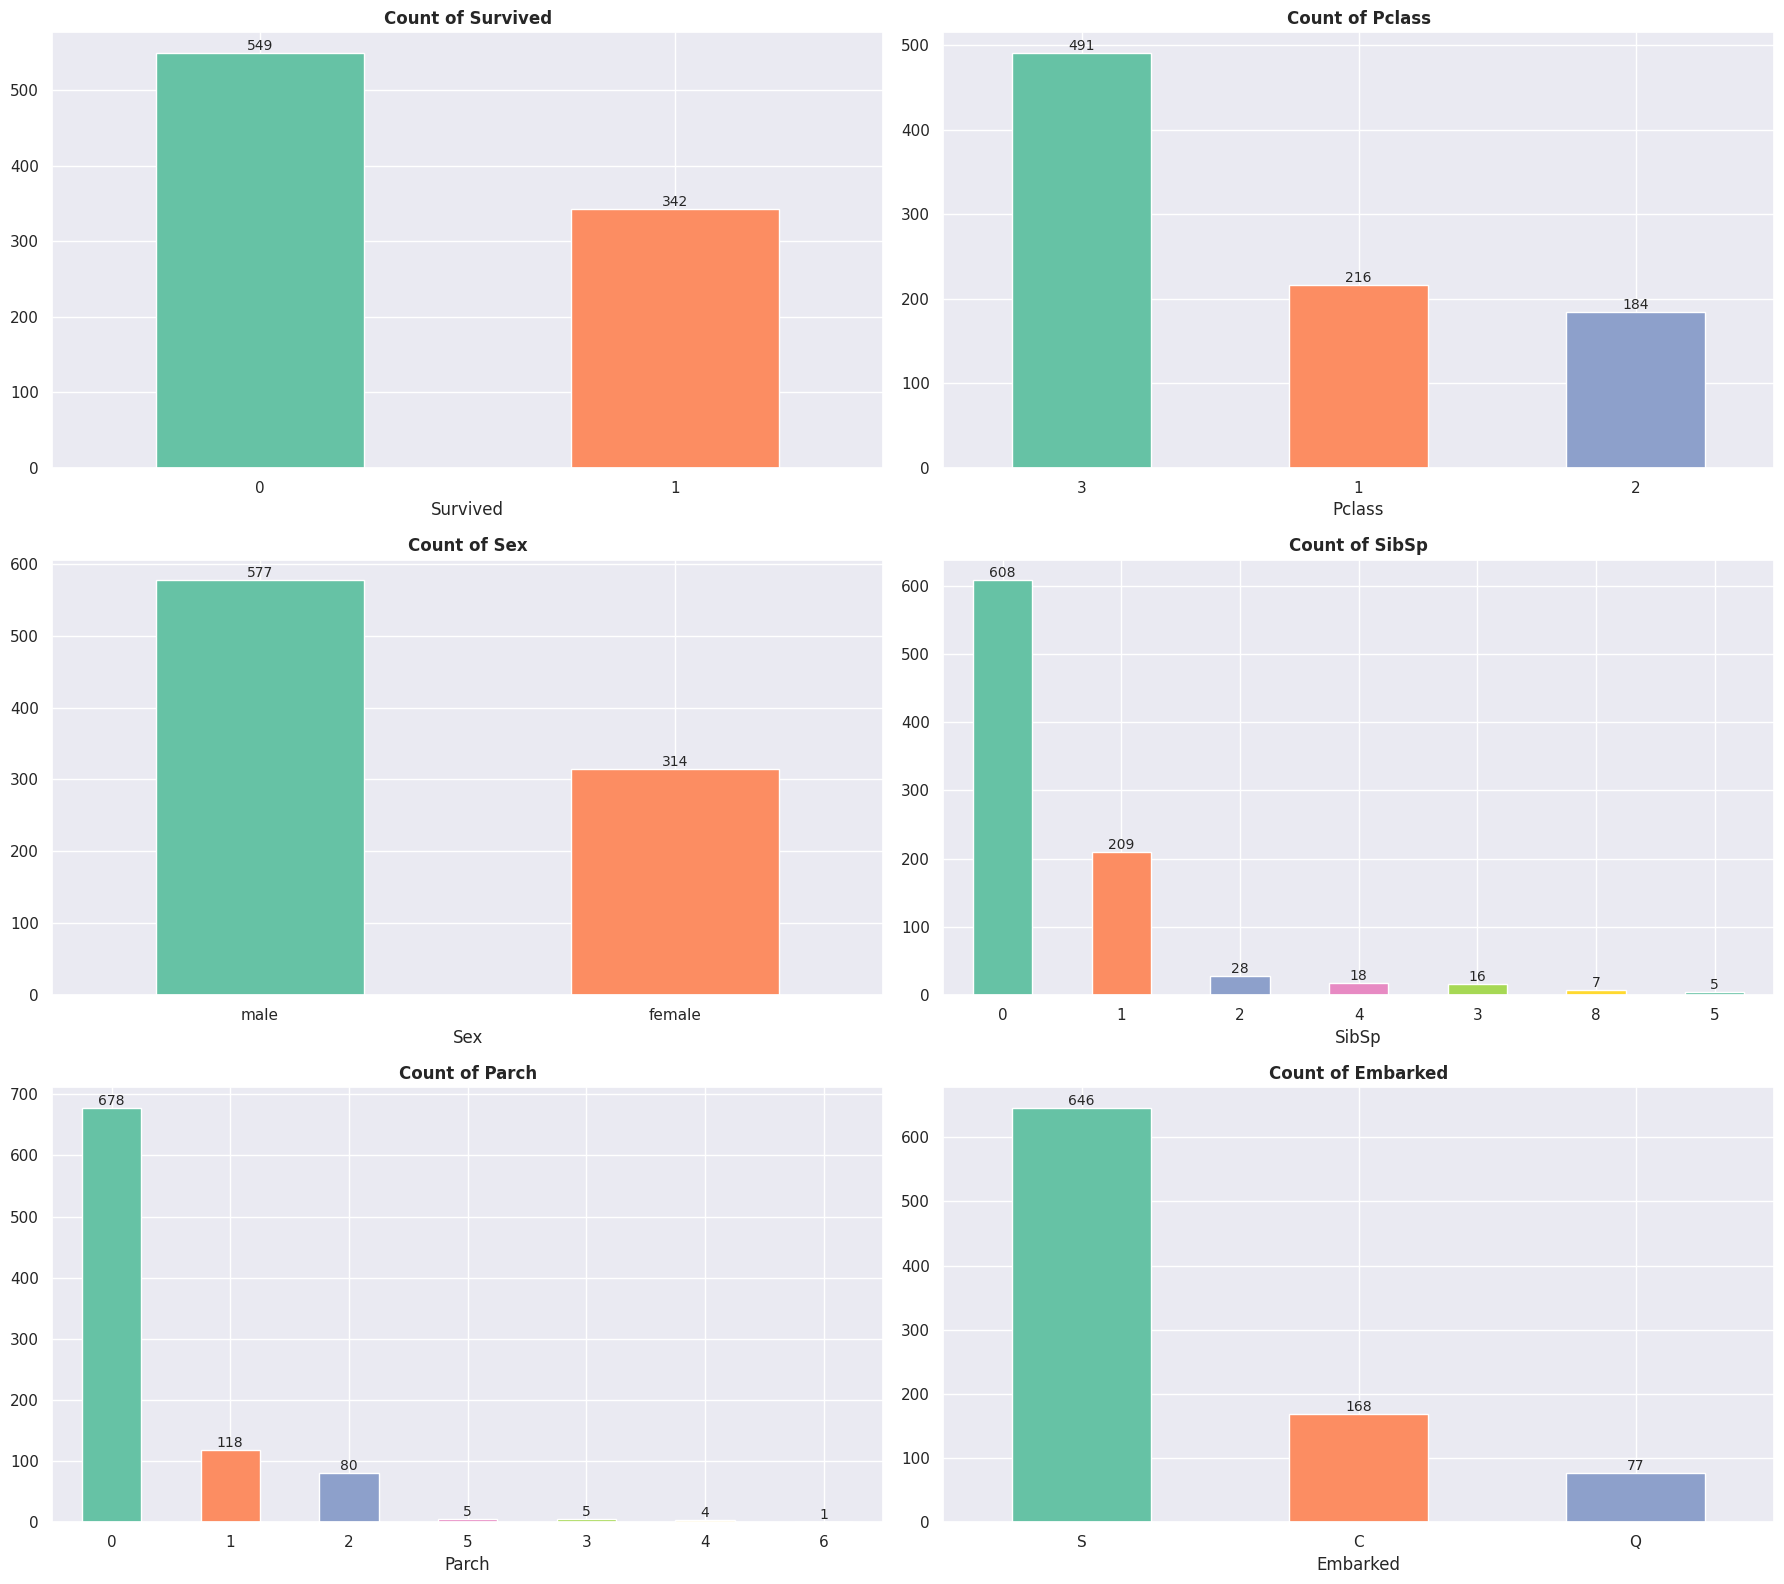

In [38]:
plt.figure(figsize=(18, 16))
sns.set(style='darkgrid')
palette = sns.color_palette("Set2", len(categorical_features(data)))  # Using a seaborn color palette

for i, d in enumerate(categorical_features(data)):
    plt.subplot(3, 2, i + 1)
    ax = data[d].value_counts().plot(kind='bar', color=palette)
    plt.xticks(rotation=0)
    plt.title(f"Count of {d}", fontweight='bold')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

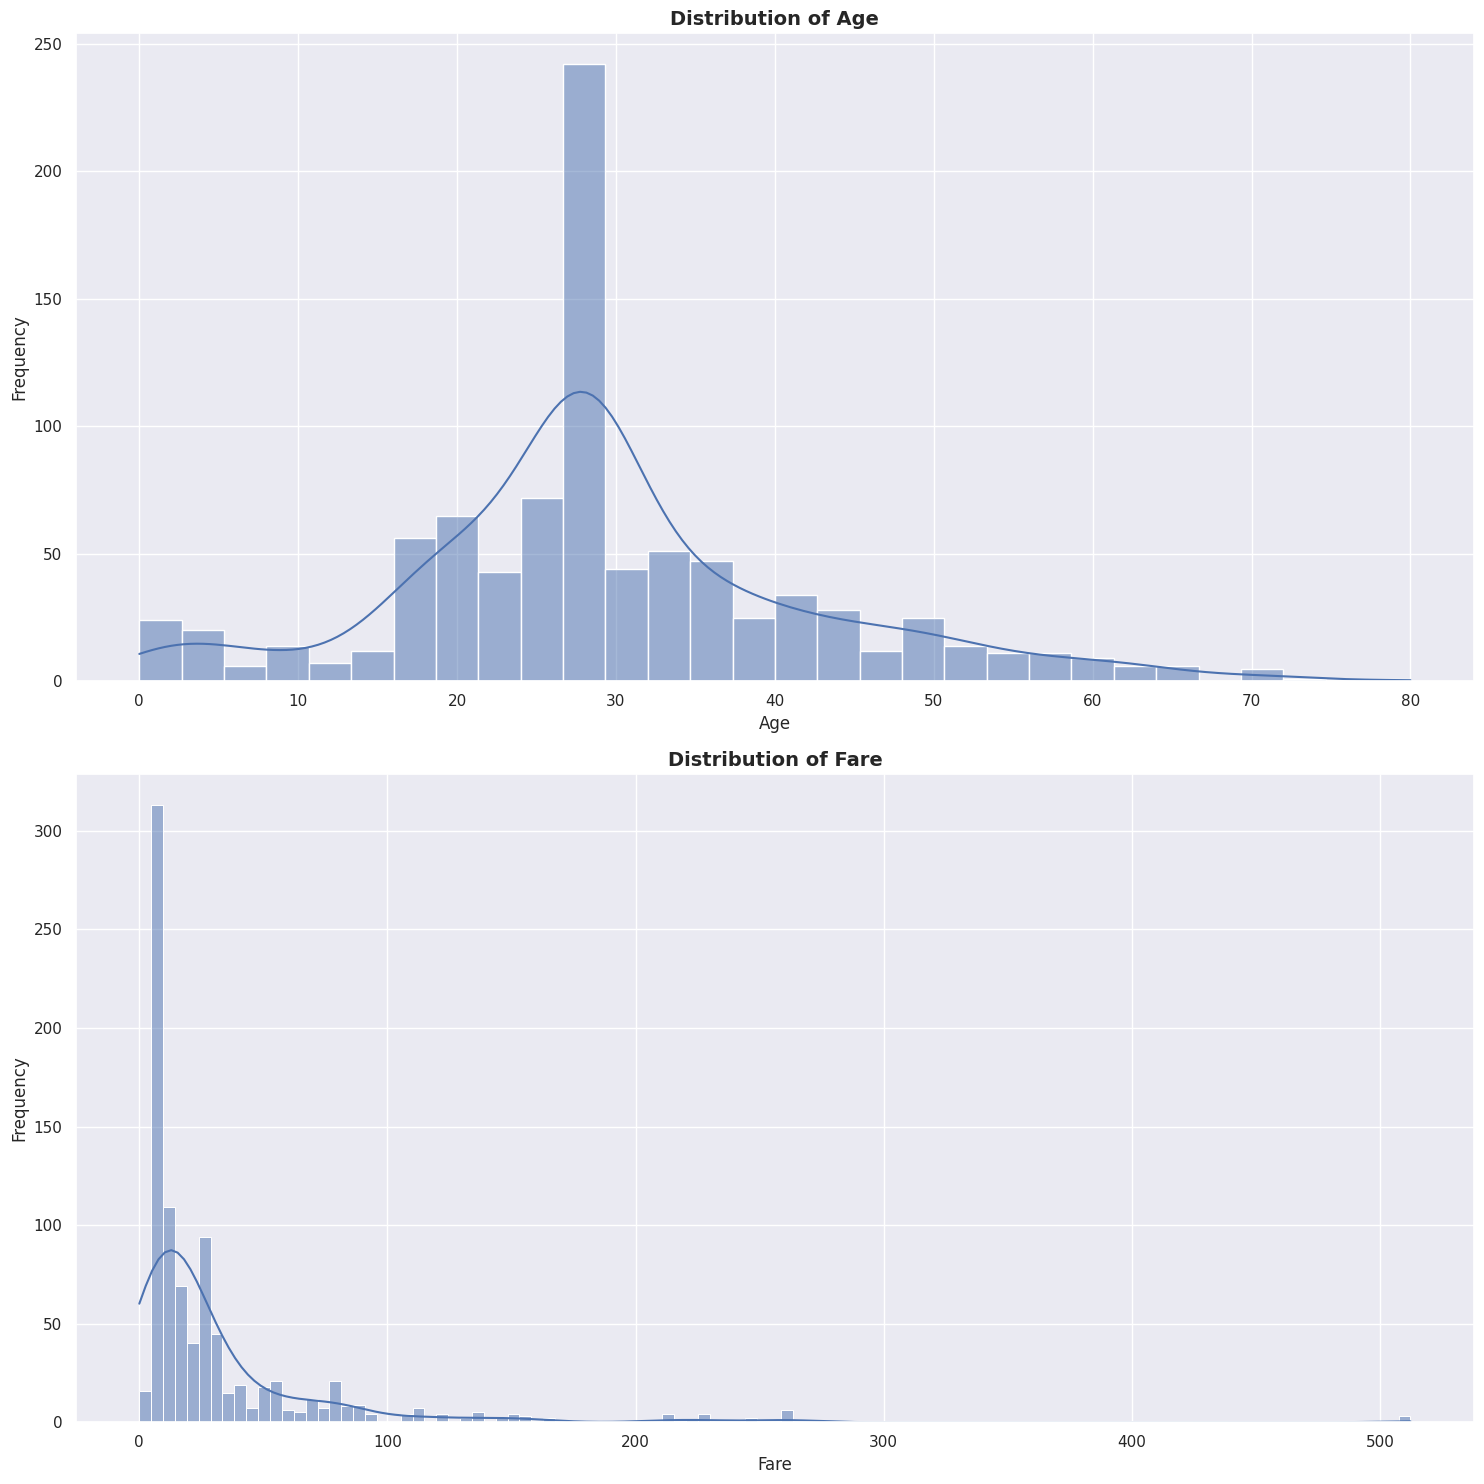

In [39]:
plt.figure(figsize=(15, 15))
sns.set(style='darkgrid')
for i, d in enumerate(numerical_features(train_data)):
    plt.subplot(2, 1, i+1)
    sns.histplot(data=train_data, x=d, kde=True)
    plt.title(f"Distribution of {d}", fontsize=14, fontweight='bold')
    plt.xlabel(d)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


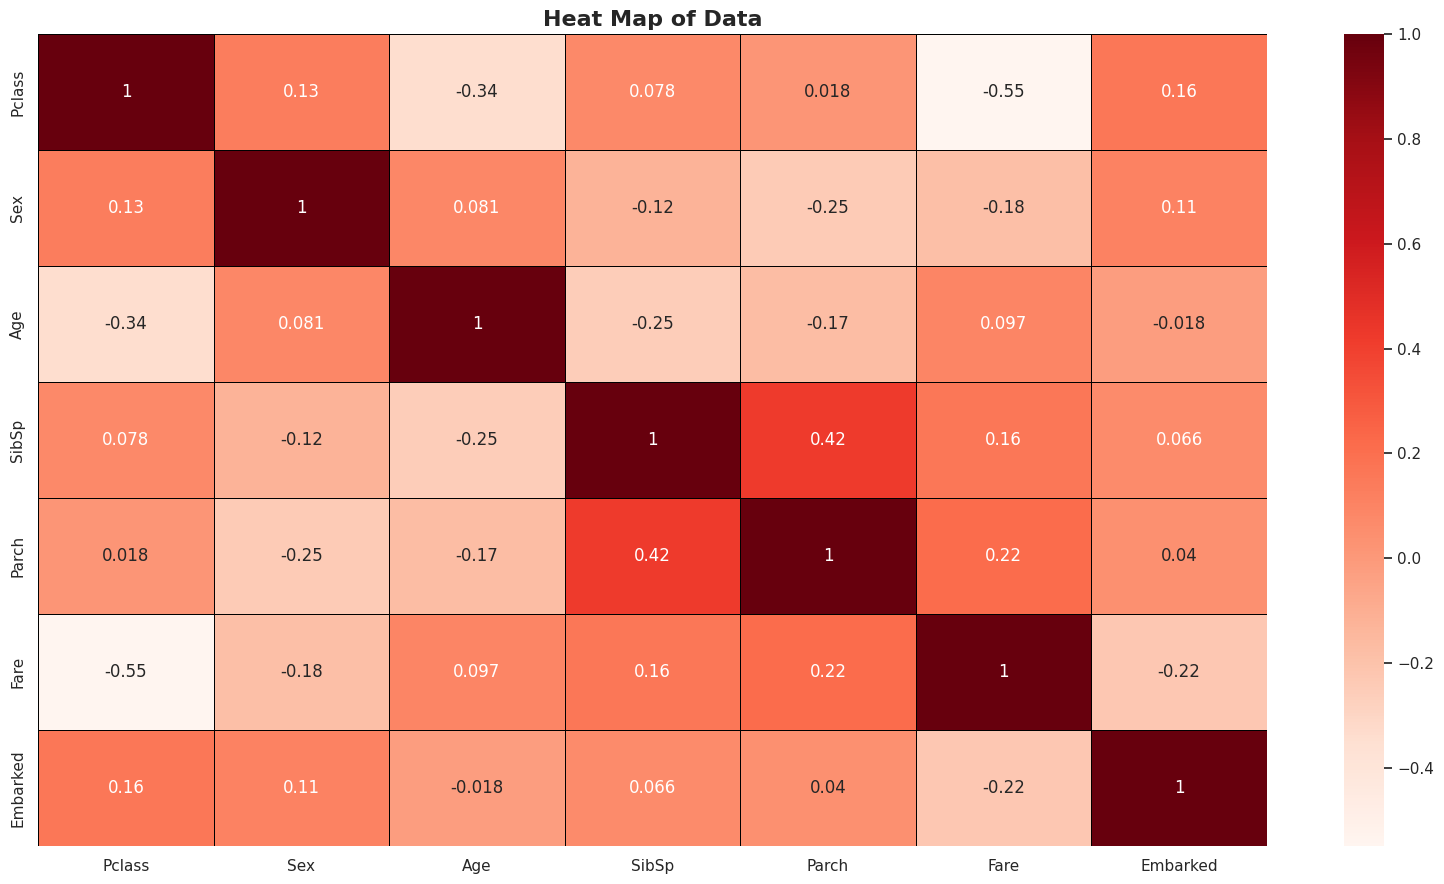

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(train_data.corr(), annot=True, cmap='Reds', linewidths=0.5, linecolor='black')
plt.title("Heat Map of Data", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

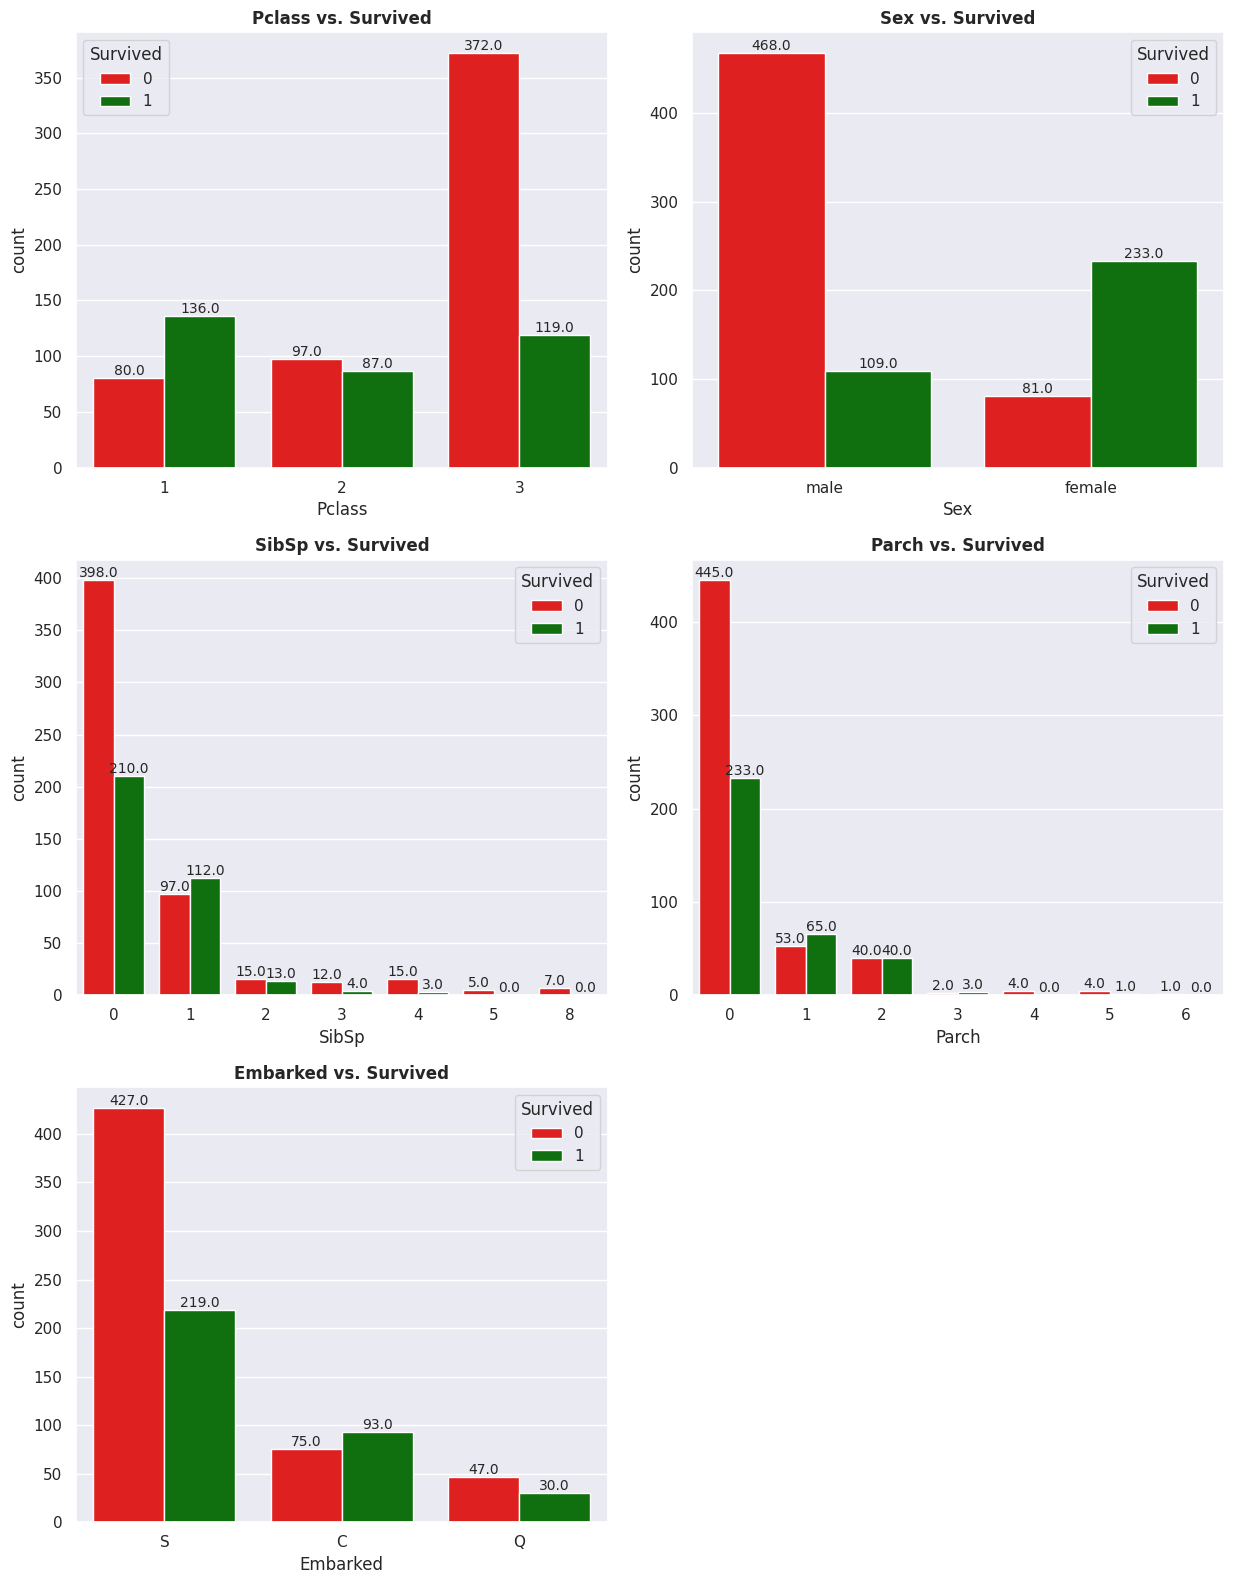

In [42]:
plt.figure(figsize=(18,16))
sns.set(style='darkgrid')
for i, d in enumerate(data.columns):
    if d in categorical_features(train_data):
        palette = ['red', 'green']  # Using a seaborn color palette
        plt.subplot(3, 3, i+1)
        ax = sns.countplot(x = data[d], hue = data['Survived'], palette=palette)
        plt.title(f"{d} vs. Survived", fontweight='bold')
        
        for p in ax.patches:
            # Get the height of the bar
            height = p.get_height()
            # Get the x-coordinate of the left side of the bar
            x = p.get_x()
            # Get the width of the bar
            width = p.get_width()
            ax.annotate(str(height), (x + width / 2., height),
                       ha='center', va='bottom', fontsize=10)
            
plt.tight_layout()
plt.show()

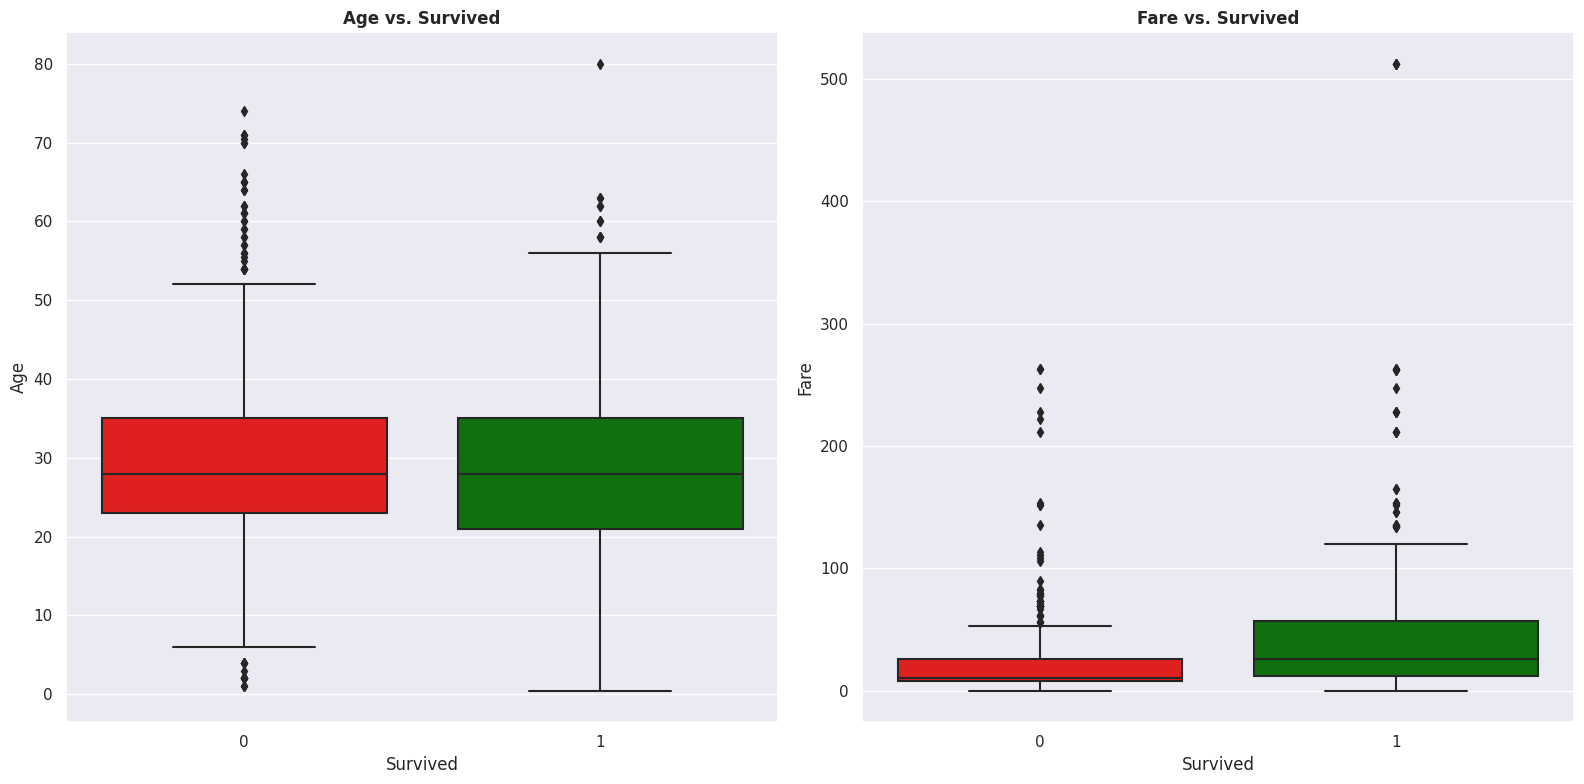

In [43]:
plt.figure(figsize=(16, 8))
for i, d in enumerate(numerical_features(data)):
    palette = ['red', 'green']
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=data['Survived'], y=data[d], palette = palette)
    plt.title(f"{d} vs. Survived", fontweight='bold')
plt.tight_layout()
plt.show()

In [44]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22,1,0,7.2500,2
1,0,0,38,1,0,71.2833,0
2,2,0,26,0,0,7.9250,2
3,0,0,35,1,0,53.1000,2
4,2,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,1,1,27,0,0,13.0000,2
887,0,0,19,0,0,30.0000,2
888,2,0,28,1,2,23.4500,2
889,0,1,26,0,0,30.0000,0


In [45]:
train_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

We'll split our training data into training and validation sets. This allows us to evaluate the performance of our models on unseen data.

In [46]:
(890/100)*20 ,(890/100)*80

(178.0, 712.0)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, 
                                                      train_label, 
                                                      test_size=0.2, 
                                                      random_state=5)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((712, 7), (179, 7), (712,), (179,))

## Baseline Modelling

In [48]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

In [49]:
baseline_mean_score = {}
np.random.seed(5)
for model_name, model in models.items():
    score = cross_val_score(model, train_data, train_label, cv=3, n_jobs=-1)
    mean_score = np.mean(score)
    baseline_mean_score[model_name] = mean_score
    print(f"{model_name}: {mean_score}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.7890011223344556
KNN: 0.7081930415263749
Random Forest: 0.7890011223344556
SVC: 0.6588103254769923
Gaussian Naive Bayes: 0.7822671156004489
XGBoost: 0.8069584736251403
CatBoost: 0.8181818181818182


In [50]:
baseline_mean_score

{'Logistic Regression': 0.7890011223344556,
 'KNN': 0.7081930415263749,
 'Random Forest': 0.7890011223344556,
 'SVC': 0.6588103254769923,
 'Gaussian Naive Bayes': 0.7822671156004489,
 'XGBoost': 0.8069584736251403,
 'CatBoost': 0.8181818181818182}

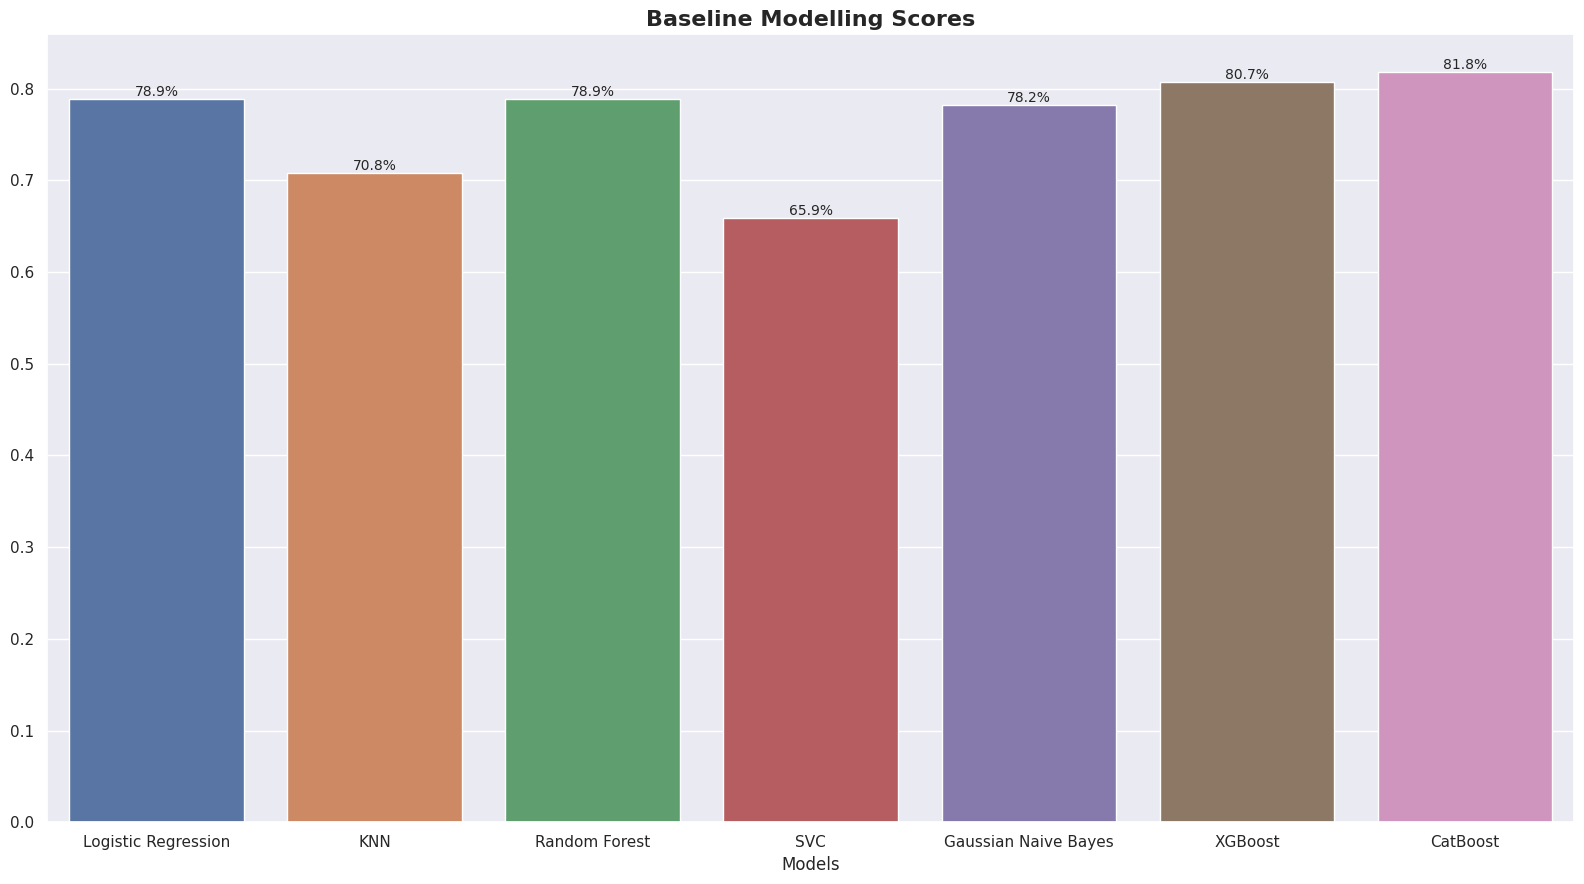

In [51]:
plt.figure(figsize=(16,9))
ax = sns.barplot(y=list(baseline_mean_score.values()), x=list(baseline_mean_score.keys()))
for p in ax.patches:
    height = p.get_height()
    x = p.get_x()
    width = p.get_width()
    ax.annotate(f"{height*100:.1f}%", (x + width / 2.0, height), ha='center', va='bottom', fontsize=10)
plt.title("Baseline Modelling Scores", fontsize=16, fontweight='bold')
plt.xlabel("Models")
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [52]:
models

{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier(),
 'SVC': SVC(),
 'Gaussian Naive Bayes': GaussianNB(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'CatBoost': <catboost.core.CatBoostClassif

In [53]:
hyperparameter_tuning = {}

### **1. Logsitic Regression**

In [54]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
lr_param = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'max_iter': [100, 1000],
    'random_state': [5],
    'n_jobs': [-1]
}

lr_gridcv = GridSearchCV(LogisticRegression(), param_grid=lr_param, cv=3, n_jobs=-1, verbose=False)

lr_gridcv.fit(X_train, y_train)
lr_best_estimator = lr_gridcv.best_estimator_
lr_accuracy = lr_gridcv.score(X_valid, y_valid)
print(f"Best estimator of Logistic Regression: {lr_best_estimator}")
print(f"Accuracy score of Logistic Regression: {lr_accuracy}")

hyperparameter_tuning['Logistic Regression'] = lr_accuracy

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/li

Best estimator of Logistic Regression: LogisticRegression(C=1, n_jobs=-1, penalty='l1', random_state=5,
                   solver='liblinear')
Accuracy score of Logistic Regression: 0.8156424581005587


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### **2. KNN**

In [56]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [57]:
knn_param = {
    'n_neighbors': [5, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'algorithm': ['auto'],
    'p': [1, 2],
    'n_jobs': [-1]
}

knn_gridcv = GridSearchCV(KNeighborsClassifier(), n_jobs=-1, cv=3, param_grid=knn_param)

knn_gridcv.fit(X_train, y_train)

knn_best_estimator = knn_gridcv.best_estimator_
knn_accuracy = knn_gridcv.score(X_valid, y_valid)

print(f"Best Estimator of KNN: {knn_best_estimator}")
print(f"Accuracy Score of KNN: {knn_accuracy}")

hyperparameter_tuning['KNN'] = knn_accuracy

Best Estimator of KNN: KNeighborsClassifier(n_jobs=-1, n_neighbors=50, p=1, weights='distance')
Accuracy Score of KNN: 0.7597765363128491


In [58]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587, 'KNN': 0.7597765363128491}

### **3. Random Forest**

In [59]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 100, 1000],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 5],
    'random_state': [5],
    'n_jobs': [-1]
}

rf_gridcv = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, n_jobs=-1, cv=3)

rf_gridcv.fit(X_train, y_train)

rf_best_estimator = rf_gridcv.best_estimator_
rf_accuracy = rf_gridcv.score(X_valid, y_valid)

print(f"Best Estimator of Random Forest: {rf_best_estimator}")
print(f"Accuracy Score of Random Forest: {rf_accuracy}")

hyperparameter_tuning['Random Forest'] = rf_accuracy

Best Estimator of Random Forest: RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=5)
Accuracy Score of Random Forest: 0.8435754189944135


In [61]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8435754189944135}

### **4. SVC**

In [62]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [63]:
svc_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [5]
}

svc_gridcv = GridSearchCV(SVC(), param_grid=svc_param, cv=3, n_jobs=-1)

svc_gridcv.fit(X_train, y_train)

svc_best_estimator = svc_gridcv.best_estimator_
svc_accuracy = svc_gridcv.score(X_valid, y_valid)

print(f"Best Estimator of SVC: {svc_best_estimator}")
print(f"Accuracy Score of SVC: {svc_accuracy}")

hyperparameter_tuning['SVC'] = svc_accuracy

Best Estimator of SVC: SVC(C=0.1, decision_function_shape='ovo', kernel='linear', random_state=5)
Accuracy Score of SVC: 0.7932960893854749


In [64]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8435754189944135,
 'SVC': 0.7932960893854749}

### **5. Gaussian Naive Bayes**

In [65]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [66]:
gnb_param = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

gnb_gridcv = GridSearchCV(GaussianNB(), param_grid=gnb_param, cv=3, n_jobs=-1)

gnb_gridcv.fit(X_train, y_train)

gnb_best_estimator = gnb_gridcv.best_estimator_
gnb_accuracy = gnb_gridcv.score(X_valid, y_valid)

print(f"Best Estimator of Gaussian Naive Bayes: {gnb_best_estimator}")
print(f"Accuracy Score of Gaussian Naive Bayes: {gnb_accuracy}")

hyperparameter_tuning['Gaussian Naive Bayes'] = gnb_accuracy

Best Estimator of Gaussian Naive Bayes: GaussianNB(var_smoothing=1e-10)
Accuracy Score of Gaussian Naive Bayes: 0.8212290502793296


In [67]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8435754189944135,
 'SVC': 0.7932960893854749,
 'Gaussian Naive Bayes': 0.8212290502793296}

### **6. XGBoost**

In [68]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [69]:
xgb_param = {
    'objective': ['binary:logistic'],
    'eval_metric': ['error'],
    'gamma': [0, 0.25, 1.0],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3,4,5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 10, 20],
    'scale_pos_weight': [None, 1,3,5],
    'random_state': [5],
    'n_jobs': [-1]
}

xgb_gridcv = GridSearchCV(XGBClassifier(), param_grid=xgb_param, cv=3, n_jobs=-1)

xgb_gridcv.fit(X_train, y_train)

xgb_best_estimator = xgb_gridcv.best_estimator_
xgb_accuracy = xgb_gridcv.score(X_valid, y_valid)

print(f"Best Estimator of XGBoost: {xgb_best_estimator}")
print(f"Accuracy Score of XGBoost: {xgb_accuracy}")

hyperparameter_tuning['XGBoost'] = xgb_accuracy

Best Estimator of XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=5, ...)
Accuracy Score of XGBoost: 0.8268156424581006


In [70]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8435754189944135,
 'SVC': 0.7932960893854749,
 'Gaussian Naive Bayes': 0.8212290502793296,
 'XGBoost': 0.8268156424581006}

### **7. CatBoost**

In [71]:
cb_param = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_seed': [5]
}

cb_gridcv = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=cb_param, cv=3, n_jobs=-1)

cb_gridcv.fit(X_train, y_train)

# Access best_estimator_ from the GridSearchCV object
cb_best_estimator = cb_gridcv.best_estimator_
cb_accuracy = cb_gridcv.best_score_

print(f"Best Estimator of CatBoost: {cb_best_estimator}")
print(f"Accuracy Score of CatBoost: {cb_accuracy}")

hyperparameter_tuning['CatBoost'] = cb_accuracy

Best Estimator of CatBoost: <catboost.core.CatBoostClassifier object at 0x7de006c7de40>
Accuracy Score of CatBoost: 0.8314304624803507


In [72]:
hyperparameter_tuning

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8435754189944135,
 'SVC': 0.7932960893854749,
 'Gaussian Naive Bayes': 0.8212290502793296,
 'XGBoost': 0.8268156424581006,
 'CatBoost': 0.8314304624803507}

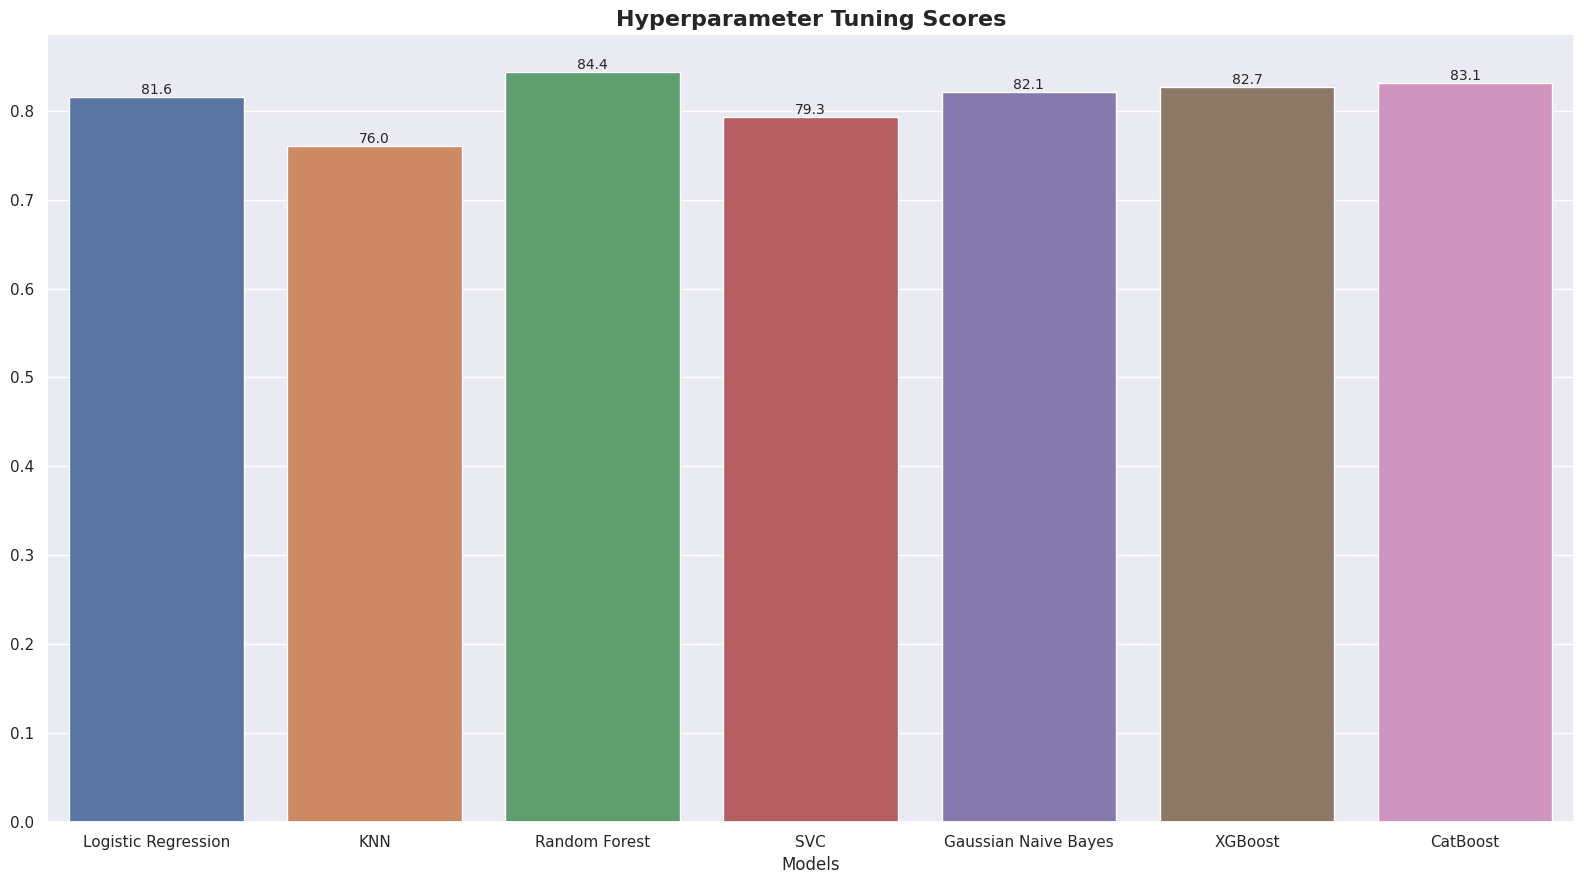

In [73]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=list(hyperparameter_tuning.keys()), y=list(hyperparameter_tuning.values()))
plt.title("Hyperparameter Tuning Scores", fontsize=16, fontweight='bold')
plt.xlabel("Models")
for p in ax.patches:
    height = p.get_height()
    x = p.get_x()
    width = p.get_width()
    ax.annotate(f"{height*100:.1f}", (x + width / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

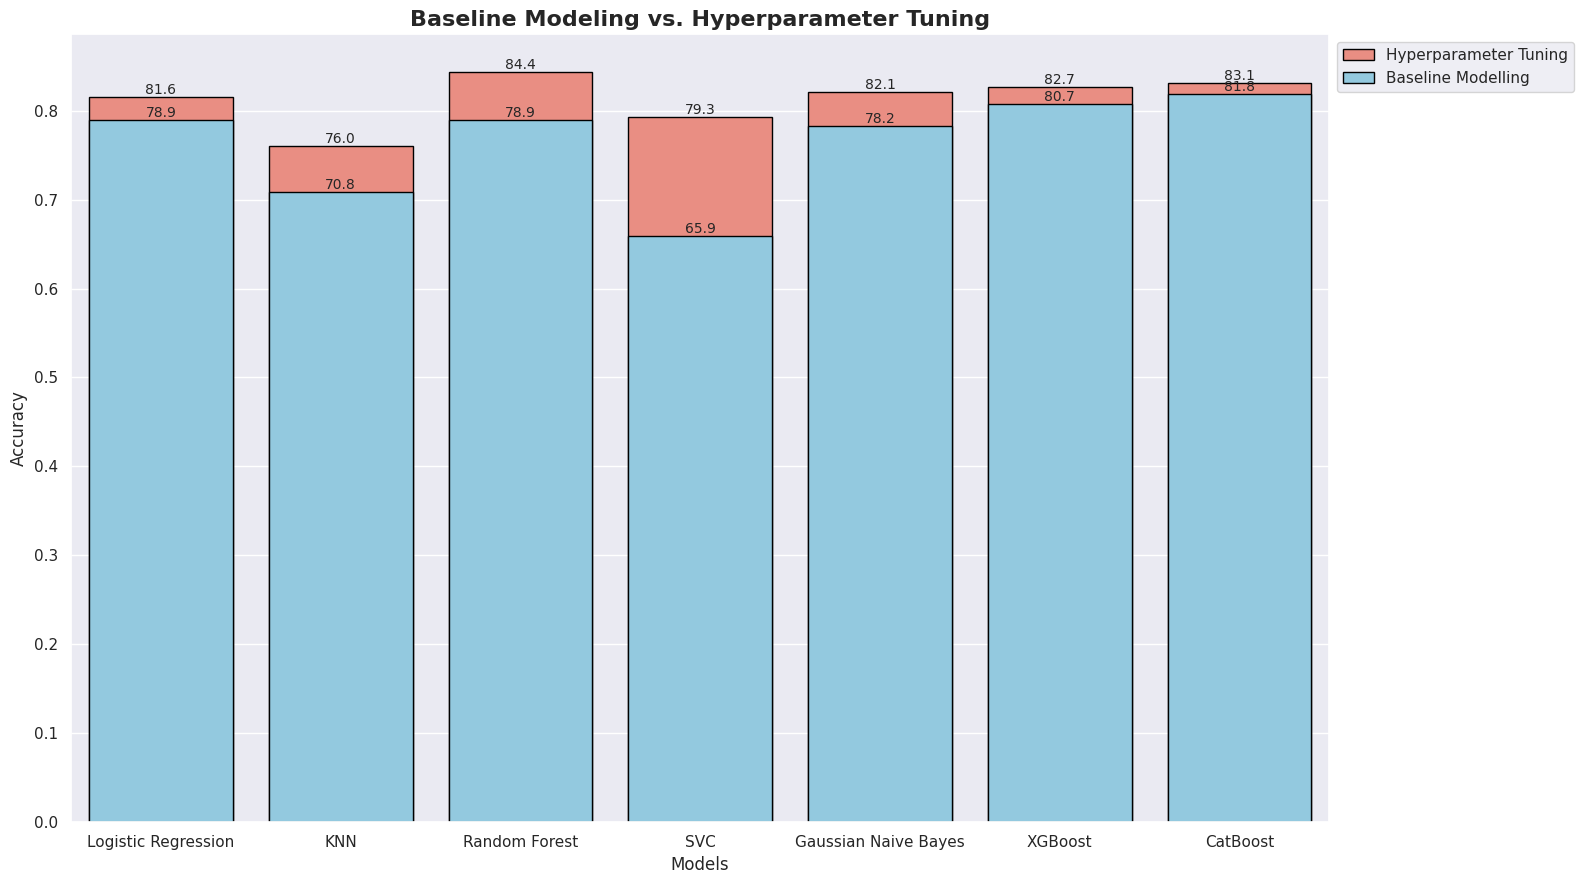

In [74]:
plt.figure(figsize=(16, 9))

# Define the data
models = list(baseline_mean_score.keys())
baseline_scores = list(baseline_mean_score.values())
tuning_scores = list(hyperparameter_tuning.values())

# Plot hyperparameter tuning mean scores
ax = sns.barplot(x=models, y=tuning_scores, color='salmon', edgecolor='black', label='Hyperparameter Tuning')

# Plot baseline mean scores
ax = sns.barplot(x=models, y=baseline_scores, color='skyblue', edgecolor='black', label='Baseline Modelling')

for p in ax.patches:
    height = p.get_height()
    x = p.get_x()
    width = p.get_width()
    ax.annotate(f"{height*100:.1f}", (x+width/2., height), ha='center', va='bottom', fontsize=10)

# Add legend
plt.legend()

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Baseline Modeling vs. Hyperparameter Tuning", fontsize=16, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [75]:
models_gridcv = {
 'Logistic Regression': lr_gridcv,
 'KNN': knn_gridcv,
 'Random Forest': rf_gridcv,
 'SVC': svc_gridcv,
 'Gaussian Naive Bayes': gnb_gridcv,
 'XGBoost': xgb_gridcv,
 'CatBoost': cb_gridcv
}

<Figure size 1600x900 with 0 Axes>

<Figure size 800x600 with 0 Axes>

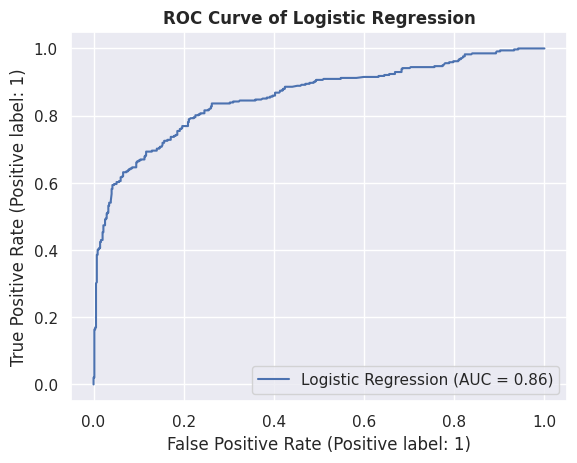

<Figure size 800x600 with 0 Axes>

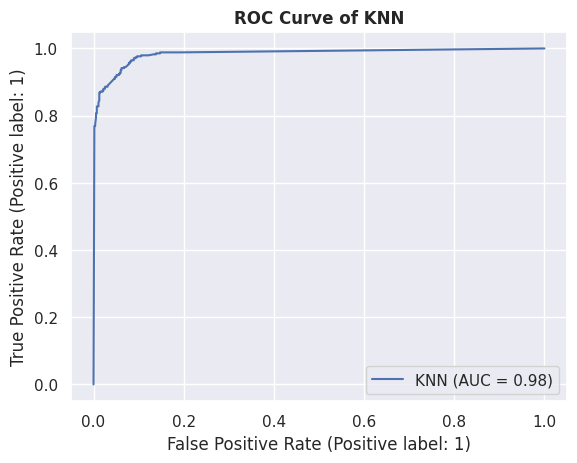

<Figure size 800x600 with 0 Axes>

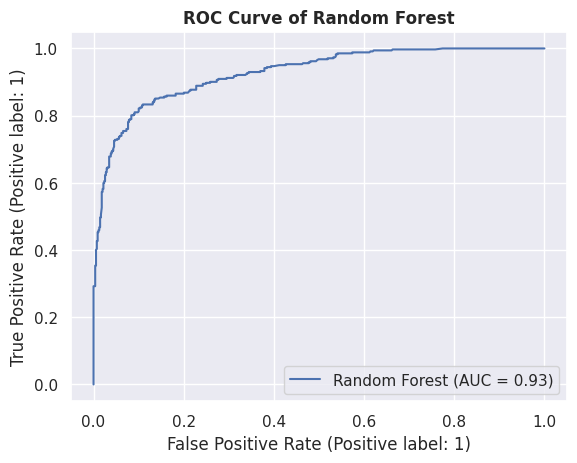

<Figure size 800x600 with 0 Axes>

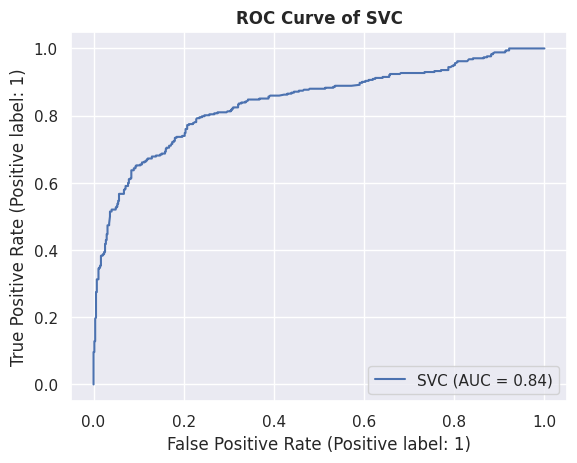

<Figure size 800x600 with 0 Axes>

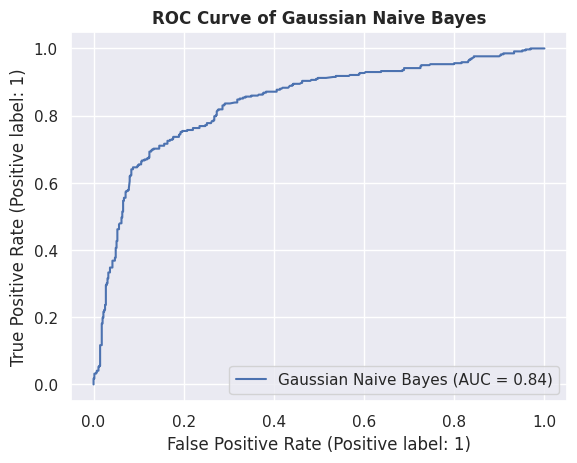

<Figure size 800x600 with 0 Axes>

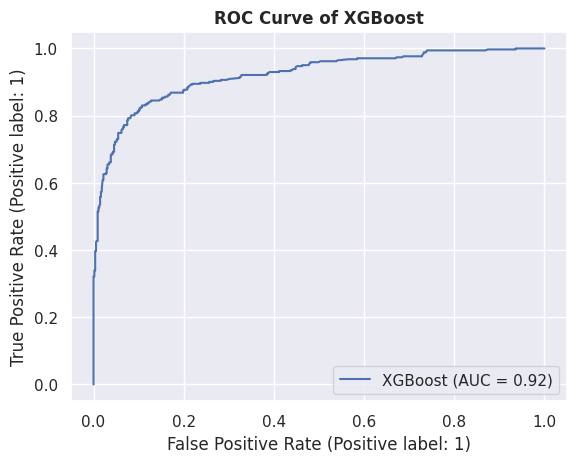

<Figure size 800x600 with 0 Axes>

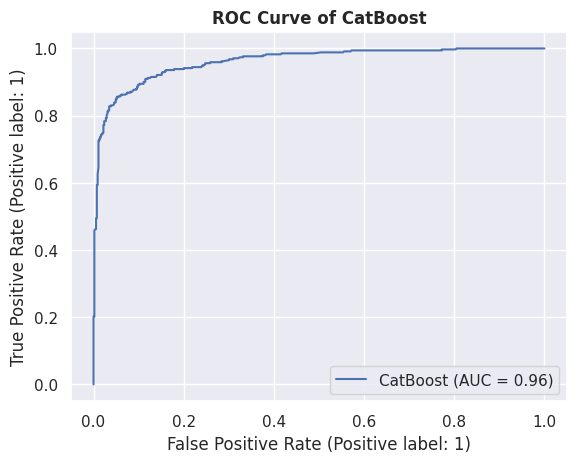

<Figure size 640x480 with 0 Axes>

In [76]:
plt.figure(figsize=(16,9))

# Loop over each model and subplot
for i, (model_name, model) in enumerate(models_gridcv.items()):
    plt.figure(figsize=(8, 6))  # Create a new figure for each subplot
    RocCurveDisplay.from_estimator(model.best_estimator_, train_data, train_label, name=model_name)
    plt.title(f"ROC Curve of {model_name}", fontweight='bold')
    plt.show()  # Display the current figure with the ROC curve

plt.tight_layout()
plt.show()

In [77]:
for model_name, model in models_gridcv.items():
    print(model_name, "\n")
    print(classification_report(y_valid, model.best_estimator_.predict(X_valid)))
    print("--"*30)

Logistic Regression 

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       111
           1       0.80      0.69      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

------------------------------------------------------------
KNN 

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       111
           1       0.73      0.59      0.65        68

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.76      0.76      0.75       179

------------------------------------------------------------
Random Forest 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       111
           1       0.87      0.69      0.77        68

    accuracy    

<Figure size 1600x900 with 0 Axes>

<Figure size 800x600 with 0 Axes>

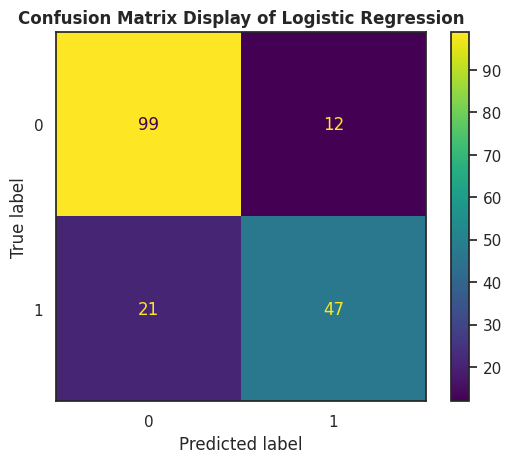

<Figure size 800x600 with 0 Axes>

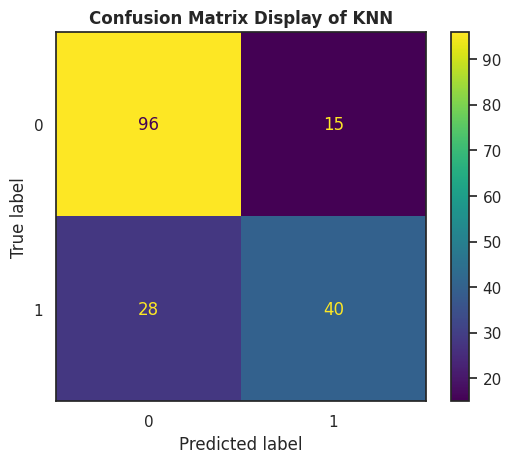

<Figure size 800x600 with 0 Axes>

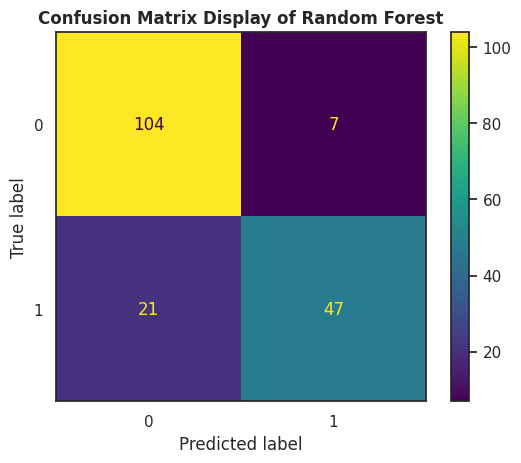

<Figure size 800x600 with 0 Axes>

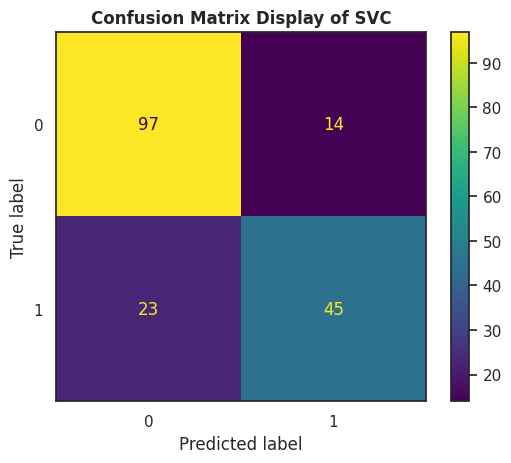

<Figure size 800x600 with 0 Axes>

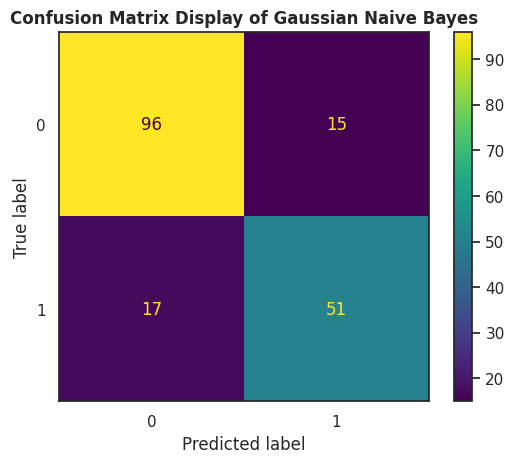

<Figure size 800x600 with 0 Axes>

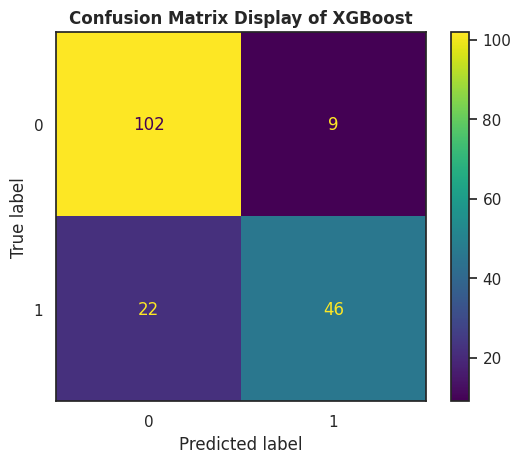

<Figure size 800x600 with 0 Axes>

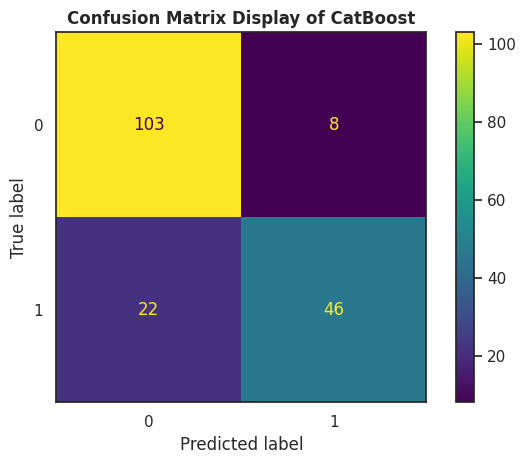

In [78]:
plt.figure(figsize=(16,9))
sns.set(style='white')

for model_name, model in models_gridcv.items():
    plt.figure(figsize=(8,6))
    ConfusionMatrixDisplay.from_estimator(model.best_estimator_, X_valid, y_valid)
    plt.title(f"Confusion Matrix Display of {model_name}", fontweight='bold')
plt.tight_layout()
plt.show()

After evaluating the performance of RandomForest with hyperparameter tuning, which yielded promising results, we will now explore the effectiveness of a neural network on our dataset.

## Neural Network

In [79]:
tf.random.set_seed(5)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose=0)

model.evaluate(X_valid, y_valid)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.6910  


[0.5529537796974182, 0.826815664768219]

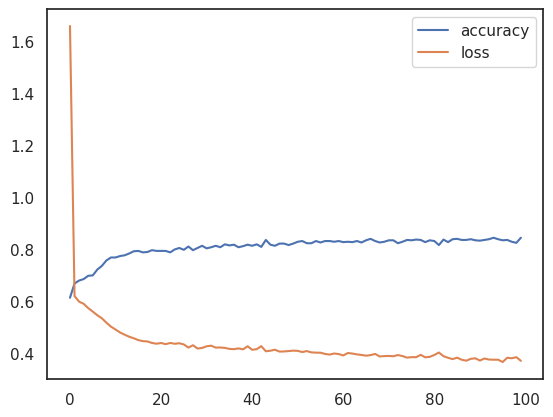

In [80]:
pd.DataFrame(history.history).plot();

In [81]:
y_preds = np.where(model.predict(X_valid) > 0.5, 1, 0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


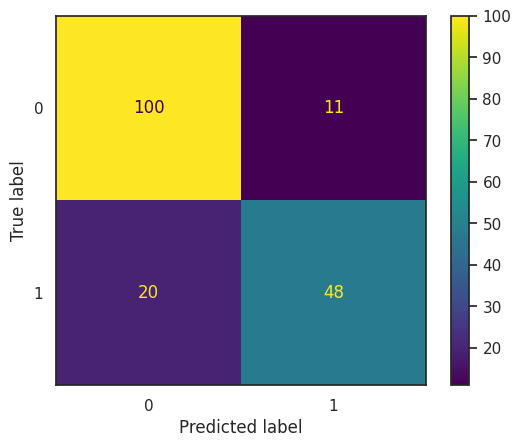

In [82]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_preds);

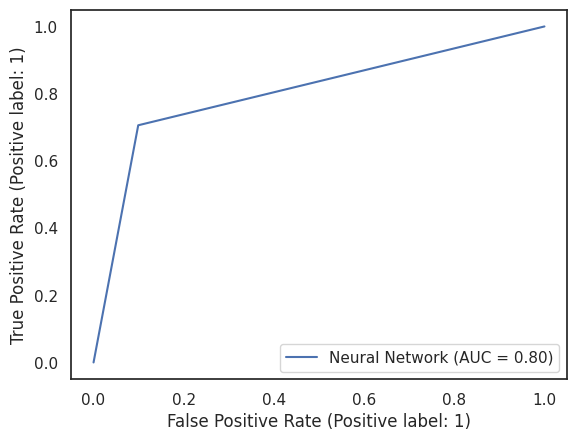

In [83]:
RocCurveDisplay.from_predictions(y_valid, y_preds, name='Neural Network');

In [84]:
print("Neural Network \n")
print(classification_report(y_valid, y_preds))

Neural Network 

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       111
           1       0.81      0.71      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



After evaluating the neural network, we found that it performed adequately. However, upon comparison with Random Forest, it became apparent that Random Forest outperforms the neural network in terms of predictive performance.

## Testing Data

In [85]:
testing_data = pd.read_csv("/kaggle/input/titanic/test.csv")
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [86]:
test_data_passengerid = testing_data['PassengerId']
test_data_passengerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [87]:
drop_exceed_null(testing_data)

"Dropped Column is: ['Cabin']"

In [88]:
drop_features(testing_data)

"Dropped Features are: ['PassengerId', 'Name', 'Ticket']"

In [89]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [90]:
testing_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [91]:
num_imputer = SimpleImputer(strategy='median')

num_features = ['Age', 'Fare']

imputer = ColumnTransformer(transformers=[('num_imputer', num_imputer, num_features)])

transformed_data = imputer.fit_transform(testing_data)

In [92]:
transformed_data = pd.DataFrame(transformed_data, columns = ['Age', 'Fare'])

In [93]:
testing_data['Fare'] = transformed_data['Fare']
testing_data['Age'] = transformed_data['Age']

In [94]:
testing_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [95]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [96]:
for i in categorical_features(testing_data):
    testing_data[i] = le.fit_transform(testing_data[i])

In [97]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [98]:
testing_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,2,1,27.0,0,0,8.0500,2
414,0,0,39.0,0,0,108.9000,0
415,2,1,38.5,0,0,7.2500,2
416,2,1,27.0,0,0,8.0500,2


## Submission File

In [99]:
submission = pd.DataFrame()

In [100]:
submission['PassengerId'] = test_data_passengerid

In [101]:
submission['Survived'] = rf_best_estimator.predict(testing_data)

In [102]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [103]:
submission.to_csv('submission.csv', index=False)

In [104]:
pd.read_csv("/kaggle/working/submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
